In [1]:
# import packages

import lyricsgenius
import pandas as pd
import requests

from textblob import TextBlob 
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

import spacy
from spacy.lang.en import English
nlp = English()
nlp.max_length = 10000000

from gensim.summarization import keywords

import helpers

In [2]:
search_term = str(input('Enter artist name'))

In [4]:
client_access_token = helpers.API_TOKEN
genius_search_url = f"http://api.genius.com/search?q={search_term}&access_token={client_access_token}"
response = requests.get(genius_search_url)
json_data = response.json()

In [5]:
songs = []
for song in json_data['response']['hits']:
    songs.append([song['result']['title'], song['result']['primary_artist']['name']])
    
#Make a Pandas dataframe from a list
song_df = pd.DataFrame(songs)
song_df.columns = ['song','artist']

In [6]:
# Function to return lyrics of each song using Genius API
def get_lyrics(title, artist):
    try:
        return genius.search_song(title, artist).lyrics
    except:
        return 'not found'


# Function to return sentiment score of each song
def get_lyric_sentiment(lyrics):
	analysis = TextBlob(lyrics) 
	return analysis.sentiment.polarity


# Function to return subjectivity score of each song
def get_lyric_subjectivity(lyrics):
	analysis = TextBlob(lyrics) 
	return analysis.sentiment.subjectivity


# Function to preprocess text
def preprocess(text):
    # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    return ' '.join(a_lemmas)


# Extract Keywords from text
def return_keywords(texts):
    xkeywords = []
    values = keywords(text=preprocess(texts),split='\n',scores=True)
    for x in values[:10]:
        xkeywords.append(x[0])
    try:
        return xkeywords 
    except:
        return "no content"

In [7]:
genius = lyricsgenius.Genius(client_access_token)

# Use get_lyrics funcion to get lyrics for every song in dataset
lyrics = song_df.apply(lambda row: get_lyrics(row['song'], row['artist']), axis =1)
song_df['Lyrics'] = lyrics
song_df = song_df.drop(song_df[song_df['Lyrics'] == 'not found'].index) #

Searching for "For You" by Liam Payne & Rita Ora...
Done.
Searching for "Girls" by Rita Ora...
Done.
Searching for "Your Song" by Rita Ora...
Done.
Searching for "Anywhere" by Rita Ora...
Done.
Searching for "Let You Love Me" by Rita Ora...
Done.
Searching for "Body on Me" by Rita Ora...
Done.
Searching for "Only Want You" by Rita Ora...
Done.
Searching for "R.I.P." by Rita Ora...
Done.
Searching for "Carry On" by Kygo & Rita Ora...
Done.
Searching for "Ritual" by Tiësto, Jonas Blue & Rita Ora...
Done.


In [8]:
# Use get_lyric_sentiment to get sentiment score for all the song lyrics
sentiment = song_df.apply(lambda row: get_lyric_sentiment(row['Lyrics']), axis =1)
song_df['Sentiment'] = sentiment

In [9]:
# Use get_lyric_subjectivity to get subjectivity score for all the song lyrics
subjectivity = song_df.apply(lambda row: get_lyric_subjectivity(row['Lyrics']), axis =1)
song_df['Subjectivity'] = subjectivity

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.close("all")

x = np.array(song_df['Sentiment'].tolist())
x = np.sort(x)
y = np.array(song_df['Subjectivity'].tolist())


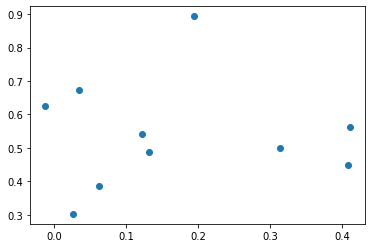

In [12]:
plt.scatter(x, y);

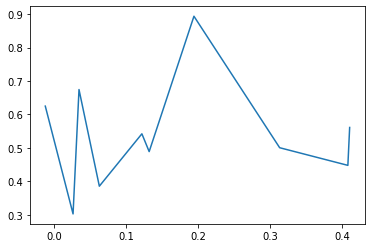

In [13]:
plt.plot(x,y)

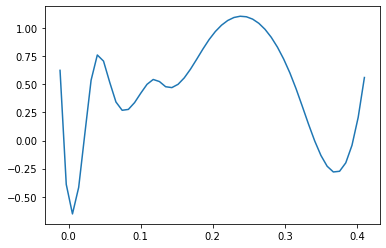

In [16]:
from scipy.interpolate import make_interp_spline, BSpline

xnew = np.linspace(x.min(), x.max())

# define spline
spl = make_interp_spline(x, y, k=3)
y_smooth = spl(xnew)

# create smooth line chart 
plt.plot(xnew, y_smooth)
plt.show()

----------